In [1]:
# kel 3ada import leli 7ajetna bih
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
import os
from detectron2.data import DatasetCatalog, MetadataCatalog

# idha 3ana dataset catalog wela meta data catlog 9dima lezem nfas5oha bech mee ysirech error 
DatasetCatalog.clear()
MetadataCatalog.clear()

# na3mlou register ll train w test dataset bech nesta3mlouhom mba3ed
register_coco_instances("train_dataset", {},r"C:\Users\toumi\OneDrive\Bureau\rr\construction safety.v2-release.coco\train\_annotations.coco.json", r"C:\Users\toumi\OneDrive\Bureau\rr\construction safety.v2-release.coco\train")
register_coco_instances("test_dataset", {}, r"C:\Users\toumi\OneDrive\Bureau\rr\construction safety.v2-release.coco\test\_annotations.coco.json", r"C:\Users\toumi\OneDrive\Bureau\rr\construction safety.v2-release.coco\test")




In [2]:
# lezem nbadlou format el data ll catalogue yefhmou el model mt3 detectron2 fel train wela fel plot zeda
train_metadata = MetadataCatalog.get("train_dataset")
train_dataset_dicts = DatasetCatalog.get("train_dataset")
# w hedhi ll test
test_metadata = MetadataCatalog.get("test_dataset")
test_dataset_dicts = DatasetCatalog.get("test_dataset")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [28]:
# na3mlou import lel 7ajet eli bech nesta3mlouhom fel model mte3na
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer # bech nesta3mloha fel train
from detectron2.engine import DefaultPredictor # bech nesta3mloha fel predict
from detectron2.config import get_cfg # bech nesta3mloha ki na5tarou el params mte3na
from detectron2.utils.visualizer import Visualizer # bech nraw beha resultat el model mte3na
from detectron2.data import MetadataCatalog, DatasetCatalog # bech nbadlou beha format el dataset
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/"
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")) # t7ot el url mt3 pretrained model mte3ek weli 5dhitou mel github mt3 detectron2
cfg.DATASETS.TRAIN = ("train_dataset",) # esem el dataset eli bech nesta3mloha fel train
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2 # hedha idha 3andek GPU t7otou kenech mee t7otouch (idha te5dem 3al CPU mathalan )
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml") # lena t7ot el weights mt3 pretrained model eli esta3malneh w 7atina el url mte3ou
cfg.MODEL.DEVICE="cpu" # t7ot hedhi ki yabda mee 3andekech GPU
cfg.SOLVER.IMS_PER_BATCH = 2  # t7otlou el batch size t9olou kol mara 5oudh ken 2 tsawer (3dad 2 mosta3mel barcha fel batch size )
cfg.SOLVER.BASE_LR = 0.001  # ta5tar el learning rate mte3ek (mel a7sen ta5tar men 0.001 ll 0.1 bech akeka tajma3 bin el sor3a wel de9a )
cfg.SOLVER.GAMMA=0.5 # ba3ed 3dad iterations mou3ayen (el 3dad ahawka fel step =100) bech nadhrbou LR fi gamma bech tzid eti7 w neb3dou 3al overfitting
cfg.SOLVER.STEPS = [20]        # 3dad el epochs eli mba3dha bech ena9es fel LR
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # Default is 512, using 128 for this dataset.

# idha fasa5na el configuration eli 7atinehom cbon el model bech y7othom par defaut ela el zouz eli ta7et hedhom mouhemin w lezem n7otouhom
cfg.SOLVER.MAX_ITER = 250   # 3dad el epochs eli bech ta3malhom fi phase train
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # 3dad el classes eli 3andek (el output 9adee feha men 7aja bech tpredicteha ) / sa3at lezmek t7ot el classes +1 5ater el model ynajem ya5tar el background kee classe zeda


In [29]:

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) # na3mlou folder esmou OUTPUT_DIR n5abiou fih resultat el train w idha mawjoud cbon mee na3mlouch we7ed e5er (exist_ok=True)
trainer = DefaultTrainer(cfg) # n3aytou ll trainer w na3tiouh el configuration eli 3malneha w akeka ywali 3ana model configurable w personnalisé
trainer.resume_or_load(resume=True) # bech ta3mel train mel 0 wela 3andek weights 9dom w tkamel train ( fi 7aletna hedhi 7atin True donc mee bdech mel 0 )


[11/21 14:39:52 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

C:\Users\toumi\anaconda3\envs\detectron_env\lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_locatio

[11/21 14:39:55 d2.engine.hooks]: Loading scheduler from state_dict ...


In [30]:
trainer.train() # kamalna bnina el architecture mt3 el model taw na3lou el training


[11/21 14:39:55 d2.engine.train_loop]: Starting training from iteration 200
[11/21 14:50:58 d2.utils.events]:  eta: 0:16:51  iter: 219  total_loss: 0.9404  loss_cls: 0.3042  loss_box_reg: 0.5679  loss_rpn_cls: 0.006703  loss_rpn_loc: 0.03075    time: 32.8549  last_time: 27.6338  data_time: 0.2972  last_data_time: 0.0052   lr: 0.00043812  
[11/21 15:01:44 d2.utils.events]:  eta: 0:05:36  iter: 239  total_loss: 0.8231  loss_cls: 0.2759  loss_box_reg: 0.5181  loss_rpn_cls: 0.004671  loss_rpn_loc: 0.02532    time: 32.5663  last_time: 28.1679  data_time: 0.0028  last_data_time: 0.0029   lr: 0.00047804  
[11/21 15:07:30 d2.utils.events]:  eta: 0:00:00  iter: 249  total_loss: 0.8529  loss_cls: 0.2874  loss_box_reg: 0.5186  loss_rpn_cls: 0.005764  loss_rpn_loc: 0.02748    time: 32.7837  last_time: 39.2521  data_time: 0.0033  last_data_time: 0.0061   lr: 0.000498  
[11/21 15:07:30 d2.engine.hooks]: Overall training speed: 48 iterations in 0:26:13 (32.7837 s / it)
[11/21 15:07:30 d2.engine.hooks

In [ ]:
!pip install tensorboard # bech nchoufou el resultat mt3 el train mte3na b tari9a mnadhma w mezyena bech tabda ashel ll fahem
import tensorboard # n3aytoulha taw
# na3mlou rassem ll metrics eli 3ana eli fi folder esmou output
%load_ext tensorboard
%tensorboard --logdir output

In [31]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # nemchiou njibou el weights mte3na bech na3mlou predict ( mawjoudin fel fichier " model_final.pth" )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # idha el model wethe9 men kel 7aja akher men 50% donc esta3malha idha a9al lee  0.5 mosta3mla en general ama tnajem ta5tar akther kifi
cfg.DATASETS.TEST = ("my_test")  # el data eli bech nesta3mloha ll test

predictor = DefaultPredictor(cfg) # te5ou el cfg eli feha el weights wel threshhold wel test dataset eli 7atinehom bekri choiya



[11/21 15:08:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/model_final.pth ...


C:\Users\toumi\anaconda3\envs\detectron_env\lib\site-packages\fvcore\common\checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_locatio

In [32]:
import cv2
import random
from detectron2.utils.visualizer import ColorMode

for d in random.sample(test_dataset_dicts, 4):    # bech ne5dhou 2 tsawer b chakel 3achwe2i mel test_dataset_dicts
    im = cv2.imread(d["file_name"])     # ne5dhou esem el taswira mel d
    outputs = predictor(im)        # na3mlou predict 3al taswira eli 5dhineha
    v = Visualizer(im[:, :, ::-1],  # nchoufou ntijet el prediction mte3na w lezemha dima fel Visualizer tkoun el format akeka (Hight ,Weight, number of channels )
                   metadata=test_metadata,
                   scale=0.7,  # n7otou 7ajem el taswira eli bech tatla3li ken t7ebha akber zid fel scale
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu")) # bech norsmou el bounding boxes mte3na w n9olou esta3mel cpu (7atta 3al collab 5aleha akeka ) el instances met5azeen feha el prediction mte3na
    cv2.imshow("img",out.get_image()[:, :, ::-1]) # n9olou warini el ntija
    # bech yestana nezla fel keyboard w ysaker el window eli 3malina feha show ll img
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

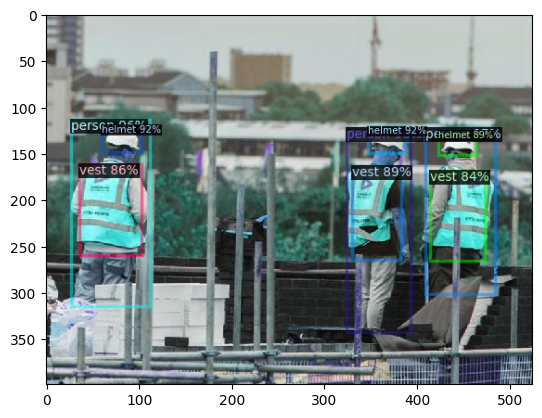

In [42]:
# na3mloulha plot b matplotlib
from matplotlib import pyplot as plt
import cv2
import random
from detectron2.utils.visualizer import ColorMode

for d in random.sample(test_dataset_dicts, 1):    # bech ne5dhou 2 tsawer b chakel 3achwe2i mel test_dataset_dicts
    im = cv2.imread(d["file_name"])     # ne5dhou esem el taswira mel d
    outputs = predictor(im)        # na3mlou predict 3al taswira eli 5dhineha
    v = Visualizer(im[:, :, ::-1],  # nchoufou ntijet el prediction mte3na w lezemha dima fel Visualizer tkoun el format akeka (Hight ,Weight, number of channels )
                   metadata=test_metadata,
                   scale=0.7,  # n7otou 7ajem el taswira eli bech tatla3li ken t7ebha akber zid fel scale
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu")) # bech norsmou el bounding boxes mte3na w n9olou esta3mel cpu (7atta 3al collab 5aleha akeka ) el instances met5azeen feha el prediction mte3na
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

In [ ]:
# idha 3andek code w t7eb ta3mel el prediction fel real time chouf code eli 7atitou fi YOLO V9 nafsou juste t7ot img eli jeya mel camera
